In [219]:
import pandas as pd
!pip install mysql-connector-python
import mysql.connector

In [220]:
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='password',
    database='cs306proj'
)

In [221]:
cursor = cnx.cursor()

In [222]:
query = "SELECT * FROM share_of_energy_generation"
cursor.execute(query)
result = cursor.fetchall()

In [223]:
df = pd.DataFrame(result, columns=[column[0] for column in cursor.description]).drop(columns=['MyUnknownColumn'])
df = df[df['Year'] == 2021]

In [224]:
import seaborn as sns
#!pip install geopandas matplotlib
import geopandas as gpd

shapefile_path = 'countries_v2'  # Path to the world map shapefile
world_map = gpd.read_file(shapefile_path)

In [225]:
merged_data = world_map.merge(df, left_on='SOV_A3', right_on='Code', how='left').fillna(0)

In [226]:
merged_data['Renewables (% electricity)'].replace(',', '.', regex=True, inplace=True)
merged_data['Renewables (% electricity)'] = merged_data['Renewables (% electricity)'].astype(float)

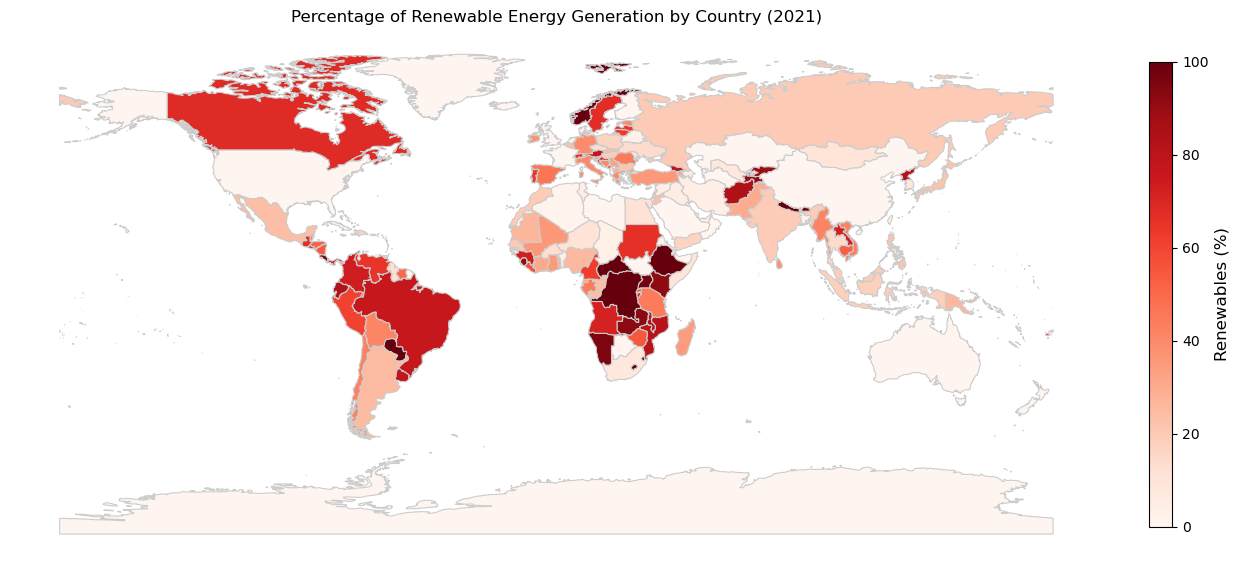

In [266]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

# Create a dummy image for the colorbar
dummy_cmap = plt.cm.ScalarMappable(colors.Normalize(vmin=0, vmax=100), cmap='Reds')
dummy_cmap.set_array([])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))

merged_data.plot(column='Renewables (% electricity)', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

ax.axis('off')

# Create the colorbar
cbar = plt.colorbar(dummy_cmap, ax=ax, fraction=0.02, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Set the font size of the tick labels
cbar.set_label('Renewables (%)', fontsize=12)  # Set the title and font size


ax.set_title('Percentage of Renewable Energy Generation by Country (2021)')
ax.axis('off')

plt.show()